In [50]:
import torch


In [51]:
image = torch.randn(480, 640).clamp(0, 1)

In [52]:
image

tensor([[1.0000, 0.8711, 0.5027,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1165, 0.0000, 0.0000],
        [0.0000, 0.4997, 1.0000,  ..., 0.0000, 0.2310, 0.0208],
        ...,
        [0.0000, 1.0000, 0.0000,  ..., 0.2501, 0.6831, 0.8681],
        [0.3918, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.1422],
        [1.0000, 0.0000, 0.6864,  ..., 0.4709, 0.4060, 0.3645]])

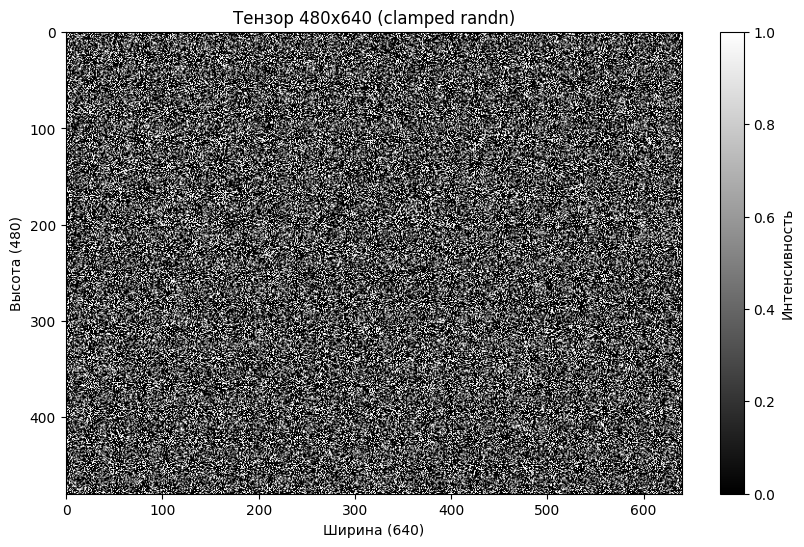

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(image.numpy(), cmap='gray')  # cmap='gray' для черно-белого
plt.colorbar(label='Интенсивность')
plt.title('Тензор 480x640 (clamped randn)')
plt.xlabel('Ширина (640)')
plt.ylabel('Высота (480)')
plt.show()

In [57]:
image

tensor([[1.0000, 0.8711, 0.5027,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1165, 0.0000, 0.0000],
        [0.0000, 0.4997, 1.0000,  ..., 0.0000, 0.2310, 0.0208],
        ...,
        [0.0000, 1.0000, 0.0000,  ..., 0.2501, 0.6831, 0.8681],
        [0.3918, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.1422],
        [1.0000, 0.0000, 0.6864,  ..., 0.4709, 0.4060, 0.3645]])

In [58]:
unfold = torch.nn.Unfold(kernel_size=20, stride=20, padding=0)

In [59]:
unfold

Unfold(kernel_size=20, dilation=1, padding=0, stride=20)

In [60]:
image = image.unsqueeze(0).unsqueeze(0)

In [61]:
image.shape

torch.Size([1, 1, 480, 640])

In [62]:
a = unfold(image)

In [63]:
a.shape

torch.Size([1, 400, 768])

In [34]:
a[0, :, 0]

tensor([0.5299, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.9923, 0.5436, 0.0000])

In [35]:
image

tensor([[[[0.5299, 0.0000, 1.0000,  ..., 0.5275, 0.0000, 0.0000],
          [1.0000, 0.0000, 0.0000,  ..., 0.4312, 0.0000, 0.9263],
          [0.9923, 0.5436, 0.0000,  ..., 1.0000, 0.4568, 0.0000],
          ...,
          [0.7524, 0.0000, 0.0000,  ..., 0.0000, 0.1886, 0.0000],
          [0.4923, 1.0000, 0.7806,  ..., 0.0000, 0.0000, 1.0000],
          [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.5813, 1.0000]]]])

In [64]:
patches_for_linear = a.permute(0, 2, 1)  # (1, 34080, 9)

In [65]:
patches_for_linear.shape

torch.Size([1, 768, 400])

In [66]:
patches_for_linear[0, 0, :]

tensor([1.0000e+00, 8.7105e-01, 5.0271e-01, 2.5249e-01, 3.3654e-01, 0.0000e+00,
        4.6433e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.5000e-01, 0.0000e+00,
        6.3650e-01, 4.1816e-01, 8.0126e-01, 0.0000e+00, 6.0899e-01, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.6803e-01,
        0.0000e+00, 1.4961e-01, 4.9727e-01, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.5449e-01, 0.0000e+00, 8.3339e-01,
        1.5387e-02, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 4.9972e-01,
        1.0000e+00, 0.0000e+00, 7.7334e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.2245e-01, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0816e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.7231e-01, 0.0000e+00,
        0.0000e+00, 7.8295e-01, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 9.5006e-02, 1.0000e+00, 1.3802e-01, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+

In [43]:
import torch.nn as nn

In [ ]:
class Encoder(torch.nn.Module):
    def __init__(self):
        pass
    def make_patches(self, image, n): #n - размер стороны патча


In [45]:
m = nn.Linear(400, 30)
m2 = nn.Linear(30, 40)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])


In [48]:
input

tensor([[-1.5963,  0.4193, -1.1701,  ...,  0.7354,  0.0171,  0.7857],
        [ 0.2204, -0.0220,  1.0168,  ..., -1.0637,  0.0594, -2.0712],
        [-0.8308,  0.0821,  0.0898,  ..., -0.5884,  1.5116,  0.1990],
        ...,
        [ 0.4728,  0.3346, -0.7437,  ..., -0.4500, -0.0577,  0.5367],
        [-0.4827,  0.2615,  0.3610,  ..., -0.4152, -1.2443,  1.0726],
        [ 0.5648,  0.2894,  0.3323,  ..., -0.6894, -0.1024,  0.5925]])

In [47]:
input.shape

torch.Size([128, 20])